In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./kmeansall.csv')

In [3]:
df.head(10)

,파도풀,유수풀,돌핀키즈존,유아풀,스플래시키즈존,정규풀,타워,레인보우슬라이드,제브라/오픈,분식,자켓대여소,바데풀,아일랜드,블루스파
0,11,7,15,7,2,6,0,0,3,1,0,5,2,3
1,14,6,14,13,1,3,0,5,0,0,0,4,5,5
2,18,17,19,18,0,1,1,6,1,0,0,2,1,1
3,9,0,8,12,0,0,0,1,0,0,0,0,0,0
4,27,21,25,31,0,2,0,13,0,0,0,0,0,0
5,7,3,4,3,0,2,0,1,0,0,1,7,7,2
6,25,24,25,15,4,18,2,10,3,3,2,3,3,3
7,16,8,14,8,3,5,2,0,3,1,3,2,1,2
8,6,0,5,5,0,0,0,1,0,0,0,0,0,0
9,16,6,10,4,3,4,1,0,1,0,0,6,6,6


In [4]:
# convert dataframe to numpy array
data_points = df.values

In [5]:
kmeans = KMeans(n_clusters=4).fit(data_points)

In [6]:
# cluster id for each data point
kmeans.labels_

array([0, 0, 1, ..., 3, 0, 0])

In [7]:
# this is final centroids position
kmeans.cluster_centers_

array([[12.15156794, 10.38675958, 12.57839721,  6.02961672,  2.77003484,
         7.44599303,  1.29268293,  1.23519164,  2.62891986,  0.94599303,
         0.76132404,  6.03658537,  5.06968641,  4.53310105],
       [21.88013699,  9.18150685, 21.51369863, 19.89383562,  1.34246575,
         4.19520548,  0.92808219,  5.90753425,  1.14041096,  0.36643836,
         0.42465753,  2.75      ,  2.35273973,  2.21575342],
       [19.32857143, 20.54285714, 19.42142857, 12.99285714,  5.07857143,
        11.525     ,  2.96428571,  3.94642857,  5.58928571,  1.43571429,
         1.00357143,  4.74642857,  3.88928571,  3.34642857],
       [ 6.60271647,  3.27674024,  7.10186757,  3.4040747 ,  0.77758913,
         2.75382003,  0.39219015,  0.66213922,  0.73005093,  0.28183362,
         0.3803056 ,  4.0713073 ,  3.47028862,  2.94906621]])

In [8]:
df['cluster_id'] = kmeans.labels_

In [9]:
df.to_csv('./cluster_id포함.csv', sep=',', na_rep='NaN')

In [10]:
df.head(10)

,파도풀,유수풀,돌핀키즈존,유아풀,스플래시키즈존,정규풀,타워,레인보우슬라이드,제브라/오픈,분식,자켓대여소,바데풀,아일랜드,블루스파,cluster_id
0,11,7,15,7,2,6,0,0,3,1,0,5,2,3,0
1,14,6,14,13,1,3,0,5,0,0,0,4,5,5,0
2,18,17,19,18,0,1,1,6,1,0,0,2,1,1,1
3,9,0,8,12,0,0,0,1,0,0,0,0,0,0,3
4,27,21,25,31,0,2,0,13,0,0,0,0,0,0,1
5,7,3,4,3,0,2,0,1,0,0,1,7,7,2,3
6,25,24,25,15,4,18,2,10,3,3,2,3,3,3,2
7,16,8,14,8,3,5,2,0,3,1,3,2,1,2,0
8,6,0,5,5,0,0,0,1,0,0,0,0,0,0,3
9,16,6,10,4,3,4,1,0,1,0,0,6,6,6,0


c:\users\강남구\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\강남구\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(28.08960069444445, 0.5, 'y')

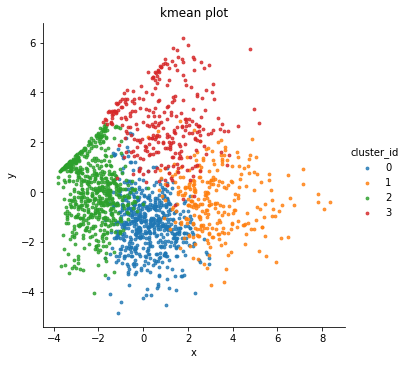

In [11]:
X = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['cluster_id']]], axis = 1)

# visualize data point
sns.lmplot('principal component 1', 'principal component 2', data=finalDf, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 8}, # marker size
           hue="cluster_id") # color


# title
plt.title('kmean plot')

# x-axis label
plt.xlabel('x')

# y-axis label
plt.ylabel('y')